<a href="https://colab.research.google.com/github/choejeongsik/postec-deep-learning-study/blob/main/Regression_and_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Graph


*  tf.constant
*  tf.Variable
*  tf.placeholder





tf.constant

상수값을 넣는다. 변하지 않는다. 

In [5]:
import tensorflow.compat.v1 as tf #기본적으로 colab은 Tensorflow2 가 설치되어있다. ver1을 사용할려면 import tensorflow.compat.v1 as tf, tf.disable_v2_behavior() 을 사용하자 
tf.disable_v2_behavior()

a=tf.constant([1,2,3])
b=tf.constant(4, shape=[1,3])

A=a+b
B=a*b

sess = tf.Session()
sess.run(A)


Instructions for updating:
non-resource variables are not supported in the long term


array([[5, 6, 7]], dtype=int32)

In [ ]:
a=tf.constant([1,2,3])
b=tf.constant([4,5,6])

result=tf.multiply(a, b)

with tf.Session() as sess:
  output=sess.run(result)
  print(output)

[ 4 10 18]


tf.Variable

상수 값을 넣는다. 변할 수 있다.

In [ ]:
x1=tf.Variable([1,1], dtype=tf.float32)
x2=tf.Variable([2,2], dtype=tf.float32)
y=x1+x2

print(y)

Tensor("add_1:0", shape=(2,), dtype=float32)


In [ ]:
sess=tf.Session()

init=tf.global_variables_initializer()
sess.run(init)

sess.run(y)

array([3., 3.], dtype=float32)

tf.placeholder

변수를 지정한다.

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

sess=tf.Session()
x=tf.placeholder(tf.float32, shape=[2,2])

sess.run(x, feed_dict={x : [[1,2],[3,4]]})

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [6]:
a=tf.placeholder(tf.float32, shape=[2])
b=tf.placeholder(tf.float32, shape=[2])

sum=a+b

sess.run(sum, feed_dict = {a : [1,2], b : [3,4]})

array([4., 6.], dtype=float32)

# Tensor Manipulation


*   Adding Matrices
*   Multiplying Matrices
*   Reshape



Adding Matrices

더하기

In [5]:
x1=tf.constant(1, shape=[3])
x2=tf.constant(2, shape=[3])

output=tf.add(x1,x2)

with tf.Session() as sess:
  result = sess.run(output)
  print(result)

[3 3 3]


In [7]:
x1=tf.constant(1, shape=[2, 3])
x2=tf.constant(2, shape=[2, 3])

output=tf.add(x1, x2)

with tf.Session() as sess:
  result=sess.run(output)
  print(result)

[[3 3 3]
 [3 3 3]]


Multiplying Matrices

행렬 곱

In [11]:
x1=tf.constant([[1, 2], [3, 4]])
x2=tf.constant([[2], [3]])

output1=tf.matmul(x1, x2)
output2=x1*x2

with tf.Session() as sess:
  result1 = sess.run(output1)
  result2 = sess.run(output2)
  print(result1)
  print('\n')
  print(result2)

[[ 8]
 [18]]


[[ 2  4]
 [ 9 12]]


Reshape

In [15]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
x_re = tf.reshape(x,[4,2])
x_re2 = tf.reshape(x, [2,-1]) #행렬의 크기를 모를때 하나만 결정되면 나머지는 자동으로 결정됨

with tf.Session() as sess:
  result1 = sess.run(x_re)
  result2 = sess.run(x_re2)
  print(result1)
  print('\n')
  print(result2)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


[[1 2 3 4]
 [5 6 7 8]]


# Tensorflow as Optimization Solver

$$min (w-4)^2$$

10.240001
6.5535994
4.194304
2.6843548
1.7179871
1.0995111
0.70368767
0.4503603
0.2882309
0.18446732

 optimal w =  3.5705032


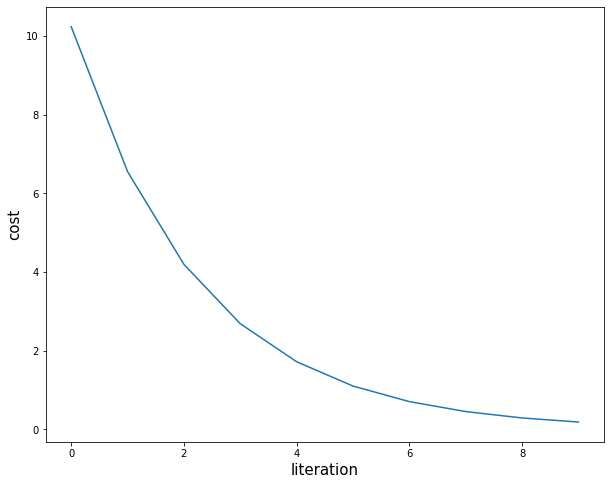

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior

w = tf.Variable(0, dtype = tf.float32)
cost = w**2 -8*w + 16

LR = 0.1
optm = tf.train.GradientDescentOptimizer(LR).minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

cost_record = []

#최적화 반복한다. print이하 부분은 없어도 됨 과정 보여주는거
for _ in range(10):
  sess.run(optm)
  print(sess.run(cost))
  cost_record.append(sess.run(cost))

print("\n optimal w = ", sess.run(w))

#수렴성 확인 plot
plt.figure(figsize = (10,8))
plt.plot(cost_record)
plt.xlabel('literation', fontsize = 15)
plt.ylabel('cost', fontsize = 15)
plt.show()

# Machine Learning with Tensorflow

##Linear Regression

$$\hat{y}=wx+b$$



*   Given x and y
*   want to estimate w and b



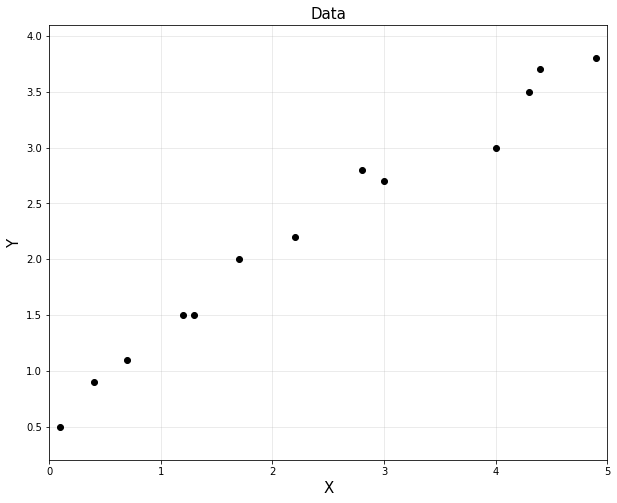

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior

#data point in column vector [input, output]
train_x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1,1)
train_y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.8]).reshape(-1,1)

m = train_x.shape[0] #차원 확인 (열개수)

plt.figure(figsize=(10,8))
plt.plot(train_x,train_y, 'ko')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

Given (xi, yi) for i= 1,2, ......m
$$\hat{y}=wx_i+b \qquad such \quad that \qquad min\sum_{i=1}^m (\hat{y}_i-y_i)^2$$

In [9]:
LR = 0.001 #step size
n_iter = 10000 #반복 횟수

x = tf.placeholder(tf.float32, shape = [m, 1])
y = tf.placeholder(tf.float32, shape = [m, 1])

w = tf.Variable([[0]], dtype = tf.float32)
b = tf.Variable([[0]], dtype = tf.float32)

y_pred = tf.add(tf.matmul(x, w), b)
loss = tf.square(y_pred - y)
loss = tf.reduce_mean(loss) #배열 요소들의 전체 평균, 뒤에 숫자 넣으면 해당 인덱스 평균

optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record=[]
for eqoch in range(n_iter):
  _, c = sess.run([optm, loss], feed_dict = {x: train_x, y: train_y})
  loss_record.append(c) #.append() 리스트 마지막에 요소 하나 추가함

w_val = sess.run(w)
b_val = sess.run(b)

sess.close()


[[0.6639878]]
[[0.66235346]]


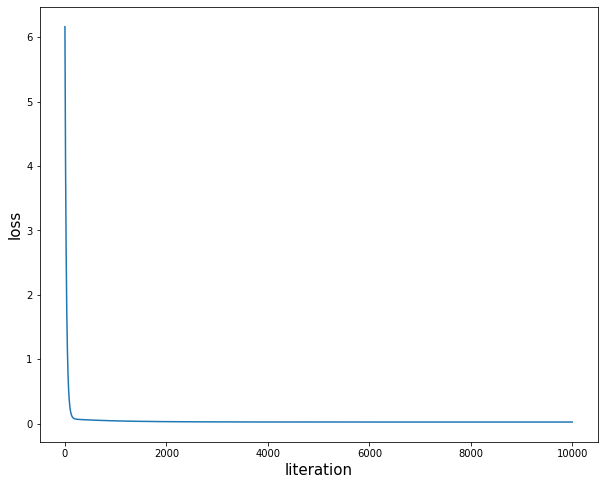

In [10]:
print(w_val)
print(b_val)

plt.figure(figsize = (10,8))
plt.plot(loss_record)
plt.xlabel('literation', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

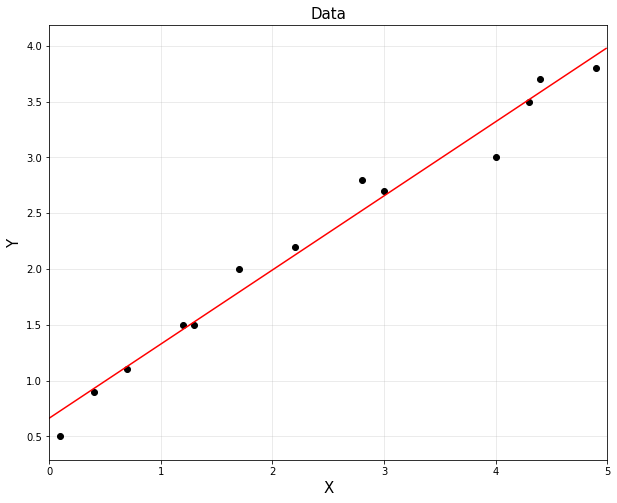

In [11]:
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp = w_val*xp+b_val

plt.figure(figsize=(10,8))
plt.plot(train_x,train_y, 'ko')
plt.plot(xp, yp, c='r')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

## Logistic Regression

$$w=\begin{bmatrix} w_0 \\ w_1 \\ w_2 \end{bmatrix}, \quad x=\begin{bmatrix} 1 \\ x_1 \\ x_2 \end{bmatrix}$$

$$X=\begin{bmatrix} (x^1)^T \\ (x^2)^T \\ (x^3)^T \\ \vdots \end{bmatrix}=\begin{bmatrix} 1 & x^1_1 &x^1_2 \\ 1 & x^2_1 &x^2_2  \\ 1 & x^3_1 &x^1_3 \\ \vdots &\vdots & \vdots \end{bmatrix}, \quad y=\begin{bmatrix} y^1 \\ y^2 \\ y^3 \\ \vdots \end{bmatrix}$$

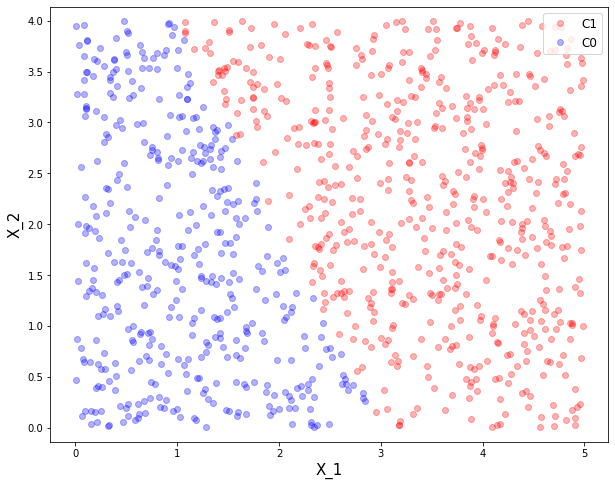

In [17]:
#data generation

m = 1000 #data 개수
true_w = np.array([[-6], [2], [1]])
train_X = np.hstack([np.ones([m, 1]), 5*np.random.rand(m,1), 4*np.random.rand(m,1)])

true_w = np.asmatrix(true_w)
train_X = np.asmatrix(train_X)

train_y = 1/(1+np.exp(-train_X*true_w)) > 0.5

C1 = np.where(train_y == True)[0]
C0 = np.where(train_y == False)[0]

train_y = np.empty([m,1])
train_y[C1] = 1
train_y[C0] = 0

plt.figure(figsize = (10,8))
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label='C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label='C0')
plt.xlabel('X_1', fontsize = 15)
plt.ylabel('X_2', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

In [21]:
LR = 0.05
n_iter = 15000

X = tf.placeholder(tf.float32, shape = [m,3])
y = tf.placeholder(tf.float32, shape = [m,1])

w = tf.Variable([[0], [0], [0]], dtype = tf.float32)

y_pred = tf.sigmoid(tf.matmul(X,w))
loss = -y*tf.log(y_pred) - (1-y)*tf.log(1-y_pred)
loss = tf.reduce_mean(loss)

optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

loss_record = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(n_iter):
    _, c = sess.run([optm, loss], feed_dict = {X: train_X, y: train_y})
    loss_record.append(c)
  
  w_hat = sess.run(w)

[[-11.627911 ]
 [  4.0275097]
 [  1.8407688]]


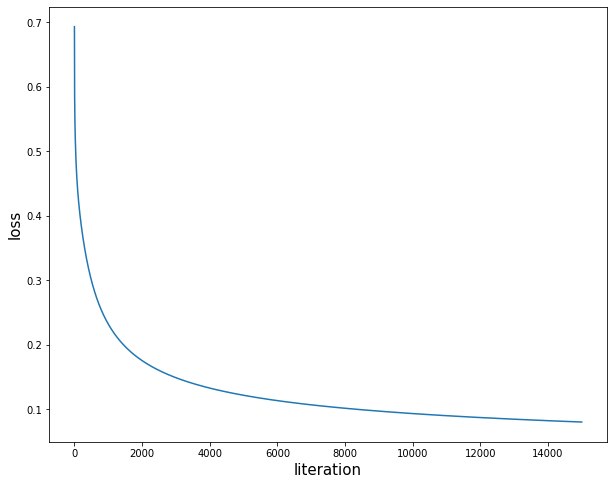

In [23]:
print(w_hat)

plt.figure(figsize = (10,8))
plt.plot(loss_record)
plt.xlabel('literation', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

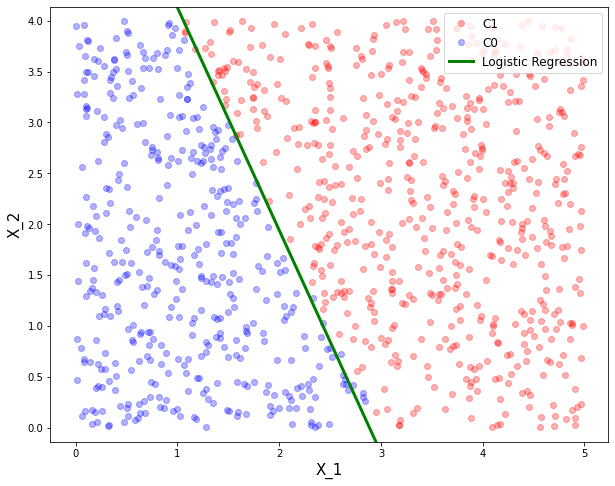

In [25]:
xp = np.arange(0, 4, 0.01).reshape(-1,1)
yp = -w_hat[1,0]/w_hat[2,0]*xp - w_hat[0,0]/w_hat[2,0]

plt.figure(figsize = (10,8))
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label='C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label='C0')
plt.plot(xp, yp, c='g', linewidth = 3, label='Logistic Regression')
plt.xlabel('X_1', fontsize = 15)
plt.ylabel('X_2', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()